# Telecom Company User Churn Rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\dnlsa\AppData\Local\Programs\Python\Python38\Scripts\telecom_users.csv')


In [3]:
# Getting an idea of the data at hand. Inspecting first 5 rows

df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,No
1,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
2,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
3,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
4,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No


In [4]:
# Looking at table dimensions

table_shape = list(df.shape)

print('Table has {} rows and {} columns'.format(table_shape[0], table_shape[1]))

Table has 5986 rows and 22 columns


In [5]:
# Verifying that data is 'clean' with same number non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [6]:
# Data is clean, but a little tweaking can make it more uniform and readable
# Senior citizen status is marked by two values: 0 (=not senior citizen) and 1 (=senior citizen)
# Showing unique values in 'SeniorCitizen' column

seniorcitizen_uniquevalues = list(pd.unique(df['SeniorCitizen']))

print('Unique values in the "SeniorCitizen" column: {}'.format(str(seniorcitizen_uniquevalues)[1:-1]))

Unique values in the "SeniorCitizen" column: 0, 1


In [7]:
# Senior citizen status in table is marked by 0 (= not senior citizen) and 1 (=senior citizen)
# Tranforming 0s to 'no' and 1s to 'yes' to conform with rest of table, and make coloumn more legible

df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: str(x).replace('0', 'No') if x == 0 else 'Yes')

# Making sure changes have been applied

seniorcitizen_uniquevalues = list(pd.unique(df['SeniorCitizen']))

print('Unique values in the "SeniorCitizen" column: {}'.format(str(seniorcitizen_uniquevalues)[1:-1]))

Unique values in the "SeniorCitizen" column: 'No', 'Yes'


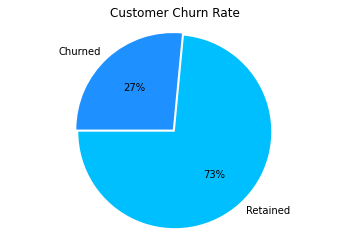

In [8]:
# Checking user churn rates
# Presenting user churn rates in pie format

churn_rate = df.groupby('Churn')['Churn'].count()
churn_rate_percentage = churn_rate / df['Churn'].count() * 100

labels = 'Retained', 'Churned'
sizes = churn_rate_percentage

fig1, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%',
        startangle=180, colors=['deepskyblue', 'dodgerblue'], explode=(0, 0.03))
ax.axis('equal')

ax.set_title("Customer Churn Rate")

plt.show()

Some initial conclusions:
* The company has a churn rate of 27%


# Customer Churn Rate Analysis

### Customer Demographics

In [9]:
# Looking at columns containing demographic data: age group, marital status, dependent offsprings, gender

df[['Partner', 'Dependents', 'SeniorCitizen', 'gender']].head()

,Partner,Dependents,SeniorCitizen,gender
0,No,Yes,No,Male
1,Yes,Yes,No,Female
2,Yes,Yes,No,Male
3,Yes,Yes,No,Male
4,Yes,Yes,No,Male


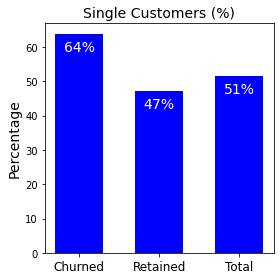

In [10]:
# Looking at ratio of users who are single from total users, churned users, and retained users
# Summing up partner stats visually, using bar chart

partner_total = df.groupby('Partner')['Partner'].count()
partner_total_ratio = partner_total / df['Partner'].count() * 100

partner_churn = df.groupby(['Churn', 'Partner'])['Partner'].count()
partner_churn_ratio = partner_churn / partner_churn.groupby(level=0).sum() * 100

labels = ['Churned', 'Retained', 'Total']
y = [partner_churn_ratio[2], partner_churn_ratio[0], partner_total_ratio[0]]

x = np.arange(len(labels))  # label locations
width = 0.6  # width of bars

fig, ax = plt.subplots(figsize=(4, 4))
rects1 = ax.bar(x, y, width, color=['blue'])

ax.set_ylabel('Percentage', size=14)
ax.set_title('Single Customers (%)', size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=12)

ax.bar_label(rects1, fmt='%.0f%%', padding=-20, color='white', size=14)

fig.tight_layout()

plt.show()

* A clear majority of churned users (64%) are single (compared to 47% of retained and 51% of total users)

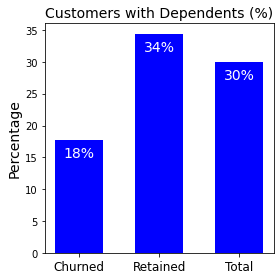

In [11]:
 # Examining ratio of users with dependents from total users, among churned users, and among retained users
    
dependents_total = df.groupby('Dependents')['Dependents'].count()
dependents_total_ratio = dependents_total / df['Dependents'].count() * 100

churn_dependents = df.groupby(['Churn', 'Dependents'])['Dependents'].count()
churn_dependents_ratio = churn_dependents / churn_dependents.groupby(level=0).sum() * 100

labels = ['Churned', 'Retained', 'Total']
y = [churn_dependents_ratio[3], churn_dependents_ratio[1], dependents_total_ratio[1]]

x = np.arange(len(labels))  
width = 0.6

fig, ax = plt.subplots(figsize=(4, 4))
rects1 = ax.bar(x, y, width, color=['blue'])

ax.set_ylabel('Percentage', size=14)
ax.set_title('Customers with Dependents (%)', size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=12)

ax.bar_label(rects1, fmt='%.0f%%', padding=-20, color='white', size=14)

fig.tight_layout()

plt.show()

* Churned users are almost twice as likely to have no dependent children than retained users (18% vs. 34%)

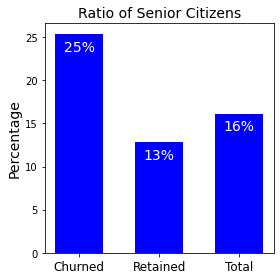

In [12]:
# Looking at data on senior citizens
# Looking at senior citizen ratio among churned, retained, and total users

seniorcitizen_total = df.groupby('SeniorCitizen')['SeniorCitizen'].count()
seniorcitizen_total_ratio = seniorcitizen_total / df['SeniorCitizen'].count() * 100

churn_seniorcitizen = df.groupby(['Churn', 'SeniorCitizen'])['SeniorCitizen'].count()
churn_seniorcitizen_ratio = churn_seniorcitizen / churn_seniorcitizen.groupby(level=0).sum() * 100

labels = ['Churned', 'Retained', 'Total']
y = [churn_seniorcitizen_ratio[3], churn_seniorcitizen_ratio[1], seniorcitizen_total_ratio[1]]

x = np.arange(len(labels)) 
width = 0.6

fig, ax = plt.subplots(figsize=(4, 4))
rects1 = ax.bar(x, y, width, color=['blue'])

ax.set_ylabel('Percentage', size=14)
ax.set_title('Ratio of Senior Citizens', size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=12)

ax.bar_label(rects1, fmt='%.0f%%', padding=-20, color='white', size=14)

fig.tight_layout()

plt.show()

* One quarter of churned users (25%) are senior citizens, which is almost double the ratio among retained users (13%).

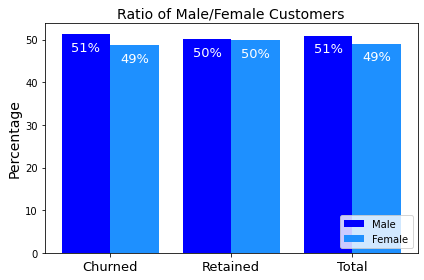

In [13]:
# Looking at the gender variable, to locate potential unique patterns among churned users

gender_total = df.groupby('gender')['gender'].count()
gender_total_percentage = gender_total / df['gender'].count() * 100

churn_gender = df.groupby(['Churn', 'gender'])['gender'].count()
churn_gender_percentage = churn_gender / churn_gender.groupby(level=0).sum() * 100

female_total = list(gender_total_percentage)[0]  # Percent of female from total users
male_total = list(gender_total_percentage)[1]  # Percent of male from total users
female_churn_grouping = list(churn_gender_percentage)[0::2]  # List of female users grouped by churn (percentage) 
male_churn_grouping = list(churn_gender_percentage)[1::2]  # List of male users grouped by churn (percentage) 

labels = ['Churned', 'Retained', 'Total']
male = [male_churn_grouping[0], male_churn_grouping[1], male_total]
female = [female_churn_grouping[0], female_churn_grouping[1], female_total]

x = np.arange(len(labels))  # label locations
width = 0.4  # width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='Male', color='blue')
rects2 = ax.bar(x + width/2, female, width, label='Female', color='dodgerblue')

ax.set_ylabel('Percentage', size=14)
ax.set_title('Ratio of Male/Female Customers', size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=13)
ax.legend(loc='lower right')

ax.bar_label(rects1, fmt='%.0f%%', padding=-20, color='white', size=13)
ax.bar_label(rects2, fmt='%.0f%%', padding=-20, color='white', size=13)

fig.tight_layout()

plt.show()

* Gender is <i>not</i> a decisive factor. It does not set churned user demographics apart from retained (or total) users.   

In [14]:
# Looking at possible contingencies between our categories
# Perhaps 'partner' and 'dependents' categories are contingent upon senior citizen status?
# Building a contingency table to check interrelation between partner and senior citizen status. 

partner_by_seniorcitizen = df.groupby(['SeniorCitizen', 'Partner'])['Partner'].count()
partner_by_seniorcitizen_percentage = partner_by_seniorcitizen / partner_by_seniorcitizen.groupby(level=0).sum() * 100

data = {'Senior citizen':['No', '', 'Yes', ''],
        'Partner status':['Single', 'Partner', 'Single', 'Partner'],
        'Churn rate':["{0:.0f}%".format(val) for val in list(partner_by_seniorcitizen_percentage)]}
table = pd.DataFrame(data=data)
table.style.hide_index()

Senior citizen,Partner status,Churn rate
No,Single,52%
,Partner,48%
Yes,Single,50%
,Partner,50%


* Senior citizen status has negligible impact on partner status

In [15]:
# hypothesizing that senior citizens are much less likely to have any dependents
# Children of senior citizens are most likely not dependent on their parents any more
# Building a contingency table to see whether or not 'dependents' is impacted by senior citizen status

dependents_by_seniorcitizen = df.groupby(['SeniorCitizen', 'Dependents'])['Dependents'].count()
dependents_by_seniorcitizen_percentage = dependents_by_seniorcitizen / dependents_by_seniorcitizen.groupby(level=0).sum() * 100

data = {'Senior citizen':['No', '', 'Yes', ''],
        'Dependents':['No', 'Yes', 'No', 'Yes'],
        'Churn rate':["{0:.0f}%".format(val) for val in list(dependents_by_seniorcitizen_percentage)]}
table = pd.DataFrame(data=data)
table.style.hide_index()

Senior citizen,Dependents,Churn rate
No,No,66%
,Yes,34%
Yes,No,92%
,Yes,8%


* Senior citizens are very unlikely to have dependents (92% of senior citizens do not have dependents). This indicates a strong dependency of the low rates of dependents on the high rates of senior citizens found among churned users.

In [16]:
# Exploring partner/dependents interrelation
# What's the impact of partner status on dependents status?

dependents_by_partner = df.groupby(['Partner', 'Dependents'])['Dependents'].count()
dependents_by_partner_percentage = dependents_by_partner / dependents_by_partner.groupby(level=0).sum() * 100

data = {'Partner status':['Single', '', 'Partner', ''],
        'Dependents':['No', 'Yes', 'No', 'Yes'],
        'Churn rate':["{0:.0f}%".format(val) for val in list(dependents_by_partner_percentage)]}
table = pd.DataFrame(data=data)
table.style.hide_index()

Partner status,Dependents,Churn rate
Single,No,90%
,Yes,10%
Partner,No,49%
,Yes,51%


* 90% of single users do not have dependents, which suggests a very strong impact of low 'partner' rate on low 'dependents' rate among churned users. 

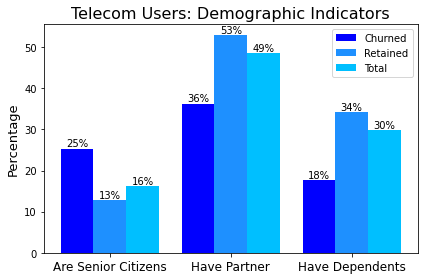

In [17]:
# Summing up pertinent demogrpahic data in bar chart
# Looking at following columns: Senior Citizen, Partner, Dependents (without Gender, which proved inconsequential)

labels = ['Are Senior Citizens', 'Have Partner', 'Have Dependents']
churned_percentage = [churn_seniorcitizen_ratio[3], partner_churn_ratio[3], churn_dependents_ratio[3]]
retained_percentage = [churn_seniorcitizen_ratio[1], partner_churn_ratio[1], churn_dependents_ratio[1]]
total_percentage = [seniorcitizen_total_ratio[1], partner_total_ratio[1], dependents_total_ratio[1]]

x = np.arange(len(labels)) 
width = 0.27

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, churned_percentage, width, label='Churned', color='b')
rects2 = ax.bar(x, retained_percentage, width, label='Retained', color='dodgerblue')
rects3 = ax.bar(x + width, total_percentage, width, label='Total', color='deepskyblue')

ax.set_ylabel('Percentage', size=13)
ax.set_title('Telecom Users: Demographic Indicators', size=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=12)
ax.legend()

ax.bar_label(rects1, fmt='%.0f%%', padding=0)
ax.bar_label(rects2, fmt='%.0f%%', padding=0)
ax.bar_label(rects3, fmt='%.0f%%', padding=0)

fig.tight_layout()

plt.show()

Demographics, conclusion:

* In comparison with retained users, churned users tend to be <b>older</b> (senior citizens compose 25% vs. 13%), <b>single</b> (64% vs. 47%) and have <b>no dependents</b> (82% vs. 66%) 
* The low ratio of dependents among churned users is highly contingent on both senior citizen and partner status 
* The user's gender proved inconsequential

### Company Services

In [18]:
# Looking at columns realting to services provided by the company

df[['InternetService', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].head()

,InternetService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,No
1,DSL,Yes,Yes,Yes,No
2,No,No internet service,No internet service,No internet service,No internet service
3,No,No internet service,No internet service,No internet service,No internet service
4,No,No internet service,No internet service,No internet service,No internet service


In [19]:
# Looking first at internet service
# Checking the variety of internet services offered by the Telecom compony

internetservice_types = list(pd.unique(df['InternetService']))
print('Unique values in the "InternetService" column: {}'.format(str(internetservice_types)[1:-1]))

Unique values in the "InternetService" column: 'DSL', 'No', 'Fiber optic'


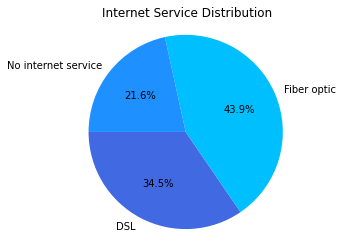

In [20]:
# Looking at distribution of internet service among total users

internetservice_total = df.groupby('InternetService')['InternetService'].count()
internetservice_total_ratio = internetservice_total / df['InternetService'].count() * 100

labels = ['DSL', 'Fiber optic', 'No internet service']
sizes = internetservice_total_ratio

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=['royalblue', 'deepskyblue', 'dodgerblue'])
ax1.axis('equal')

ax1.set_title("Internet Service Distribution")

plt.show()

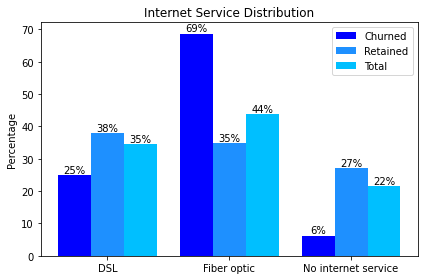

In [21]:
# Looking at internet service distribution among churned, retained, and total users

internetservice_churn = df.groupby(['Churn', 'InternetService'])['InternetService'].count()
internetservice_churn_ratio = internetservice_churn / internetservice_churn.groupby(level=0).sum() * 100

labels = ['DSL', 'Fiber optic', 'No internet service']
churned_ratio = [internetservice_churn_ratio[3], internetservice_churn_ratio[4], internetservice_churn_ratio[5]] 
retained_ratio = [internetservice_churn_ratio[0], internetservice_churn_ratio[1], internetservice_churn_ratio[2]] 
total_ratio = [internetservice_total_ratio[0], internetservice_total_ratio[1], internetservice_total_ratio[2]]

x = np.arange(len(labels)) 
width = 0.27 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, churned_ratio, width, label='Churned', color='b')
rects2 = ax.bar(x, retained_ratio, width, label='Retained', color='dodgerblue')
rects3 = ax.bar(x + width, total_ratio, width, label='Total', color='deepskyblue')

ax.set_ylabel('Percentage')
ax.set_title('Internet Service Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, fmt='%.0f%%', padding=0)
ax.bar_label(rects2, fmt='%.0f%%', padding=0)
ax.bar_label(rects3, fmt='%.0f%%', padding=0)

fig.tight_layout()

plt.show()

* Churned users are interested in the company's internet service; only 6% of churned users receive no internet service (as opposed to 27% of retained users)  
* A clear majority of churned users (69%) use <b>fiber optic internet</b>, compared to approximately one third (35%) of retained users.

In [22]:
# Churned users are by and large internet users
# Now looking at internet service type among churned/retained internet users (i.e. excluding users with no internet service)
# Using table to present data

internetservice_internetusers = df[(df['InternetService'] == 'DSL') | (df['InternetService'] == 'Fiber optic')]
internetservice_internetusers_churn = internetservice_internetusers.groupby(['Churn', 'InternetService'])['InternetService'].count()
internetservice_internetusers_churn_ratio = internetservice_internetusers_churn / internetservice_internetusers_churn.groupby(level=0).sum()

data = {'Churn status':['Retained', '', 'Churned', ''],
        'Internet service':['DSL', 'Fiber optic', 'DSL', 'Fiber optic'],
        'Churn rate':['{0:.0f}%'.format(val * 100) for val in list(internetservice_internetusers_churn_ratio)]}
table = pd.DataFrame(data=data)
table.style.hide_index()


Churn status,Internet service,Churn rate
Retained,DSL,52%
,Fiber optic,48%
Churned,DSL,27%
,Fiber optic,73%


* 73% of churned customers who are subscribed to the company's internet service use the company's fiber optic internet connection

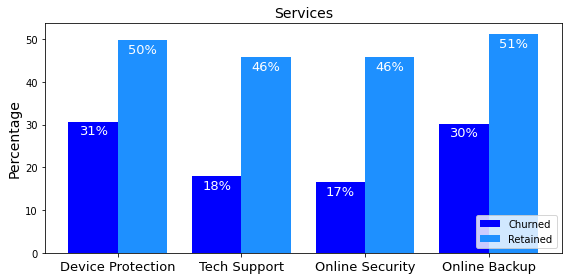

In [23]:
# Looking deeper into churned users' preference for fiber optics
# What does this tell us about churned users' computer savviness and sense of cyber security?
# Checking use of device protection and tech support services among (un)churned users who use internet service

df_deviceprotection_internetusers = df[(df['DeviceProtection'] == 'Yes') | (df['DeviceProtection'] == 'No')]
deviceprotection_churn = df_deviceprotection_internetusers.groupby(['Churn', 'DeviceProtection'])['DeviceProtection'].count()
deviceprotection_churn_ratio = deviceprotection_churn / deviceprotection_churn.groupby(level=0).sum() * 100

df_techsupport_internetusers = df[(df['TechSupport'] == 'Yes') | (df['TechSupport'] == 'No')]
techsupport_churn = df_techsupport_internetusers.groupby(['Churn', 'TechSupport'])['TechSupport'].count()
techsupport_churn_ratio = techsupport_churn / techsupport_churn.groupby(level=0).sum() * 100

df_onlinesecurity_internetusers = df[(df['OnlineSecurity'] == 'Yes') | (df['OnlineSecurity'] == 'No')]
onlinesecurity_churn = df_onlinesecurity_internetusers.groupby(['Churn', 'OnlineSecurity'])['OnlineSecurity'].count()
onlinesecurity_churn_ratio = onlinesecurity_churn / onlinesecurity_churn.groupby(level=0).sum() * 100

df_onlinebackup_internetusers = df[(df['OnlineBackup'] == 'Yes') | (df['OnlineBackup'] == 'No')]
onlinebackup_churn = df_onlinebackup_internetusers.groupby(['Churn', 'OnlineBackup'])['OnlineBackup'].count()
onlinebackup_churn_ratio = onlinebackup_churn / onlinebackup_churn.groupby(level=0).sum() * 100

labels = ['Device Protection', 'Tech Support', 'Online Security', 'Online Backup']
churned_protection_tech = [deviceprotection_churn_ratio[3], techsupport_churn_ratio[3], onlinesecurity_churn_ratio[3], onlinebackup_churn_ratio[3]]
retained_protection_tech = [deviceprotection_churn_ratio[1], techsupport_churn_ratio[1], onlinesecurity_churn_ratio[1], onlinebackup_churn_ratio[1]]

x = np.arange(len(labels))
width = 0.4

fig, (ax1) = plt.subplots(figsize=(8, 4))
rects1 = ax1.bar(x - width/2, churned_protection_tech, width, label='Churned', color='blue')
rects2 = ax1.bar(x + width/2, retained_protection_tech, width, label='Retained', color='dodgerblue')

ax1.set_ylabel('Percentage', size=14)
ax1.set_title('Services', size=14)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, size=13)
ax1.legend(loc='lower right')

ax1.bar_label(rects1, fmt='%.0f%%', padding=-16, color='white', size=13)
ax1.bar_label(rects2, fmt='%.0f%%', padding=-16, color='white', size=13)

fig.tight_layout()

plt.show()

* A clear majority of churned users don't tend to rely on the company for device protection, tech support, online security and online backup suggsting they are tech-savvy and/or are well-informed on other better-suited alternatives that render the company's services superfluous

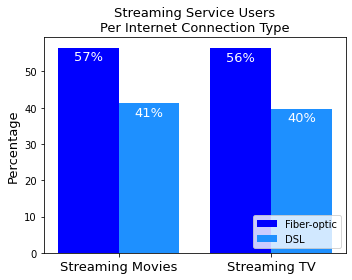

In [24]:
# Looking at other premium services: streaming services (movie & tv)
# First, Looking at streaming services according to internet service type, excluding users with no internet service
# Is there a correation between type of internet service and use of streaming services?

df_streamingmovies_internetusers = df[(df['StreamingMovies'] == 'Yes') | (df['StreamingMovies'] == 'No')]
streamingmovies_internetservice = df_streamingmovies_internetusers.groupby(['InternetService', 'StreamingMovies'])['StreamingMovies'].count()
streamingmovies_internetservice_ratio = streamingmovies_internetservice / streamingmovies_internetservice.groupby(level=0).sum() * 100

df_streamingtv_internetusers = df[(df['StreamingTV'] == 'Yes') | (df['StreamingTV'] == 'No')]
streamingtv_internetservice = df_streamingtv_internetusers.groupby(['InternetService', 'StreamingTV'])['StreamingTV'].count()
streamingtv_internetservice_ratio = streamingtv_internetservice / streamingtv_internetservice.groupby(level=0).sum() * 100

labels = ['Streaming Movies', 'Streaming TV']
dsl_streaming = [streamingmovies_internetservice_ratio[1], streamingtv_internetservice_ratio[1]]
fiberoptics_streaming = [streamingmovies_internetservice_ratio[3], streamingtv_internetservice_ratio[3]]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(5, 4))
rects1 = ax.bar(x - width/2, fiberoptics_streaming, width, label='Fiber-optic', color='b')
rects2 = ax.bar(x + width/2, dsl_streaming, width, label='DSL', color='dodgerblue')

ax.set_ylabel('Percentage', size=13)
ax.set_title('Streaming Service Users\nPer Internet Connection Type', size=13)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=13)
ax.legend(loc='lower right')

ax.bar_label(rects1, fmt='%.0f%%', padding=-16, color='white', size=13)
ax.bar_label(rects2, fmt='%.0f%%', padding=-16, color='white', size=13)

fig.tight_layout()

plt.show()

* Streaming services are more popular among fiber optic users (56%-57% vs. 40%-41% of DSL users), who, as shown previously, compose approximately 70% of churned users.

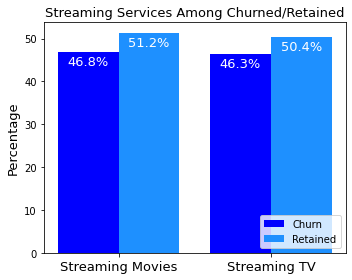

In [28]:
# Looking at streaming services according to customer churn (excluding users with no internet service)
# Do streaming services provide added value that encourages user retention?

df_streamingmovies_internetusers = df[(df['StreamingMovies'] == 'Yes') | (df['StreamingMovies'] == 'No')]
streamingmovies_churn = df_streamingmovies_internetusers.groupby(['Churn', 'StreamingMovies'])['StreamingMovies'].count()
streamingmovies_churn_ratio = streamingmovies_churn / streamingmovies_churn.groupby(level=0).sum() * 100

df_streamingtv_internetusers = df[(df['StreamingTV'] == 'Yes') | (df['StreamingTV'] == 'No')]
streamingtv_churn = df_streamingtv_internetusers.groupby(['Churn', 'StreamingTV'])['StreamingTV'].count()
streamingtv_churn_ratio = streamingtv_churn / streamingtv_churn.groupby(level=0).sum() * 100

labels = ['Streaming Movies', 'Streaming TV']
churn_streaming = [streamingmovies_churn_ratio[3], streamingtv_churn_ratio[3]]
retention_streaming = [streamingmovies_churn_ratio[1], streamingtv_churn_ratio[1]]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(5, 4))
rects1 = ax.bar(x - width/2, churn_streaming, width, label='Churn', color='b')
rects2 = ax.bar(x + width/2, retention_streaming, width, label='Retained', color='dodgerblue')

ax.set_ylabel('Percentage', size=13)
ax.set_title('Streaming Services Among Churned/Retained', size=13)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=13)
ax.legend(loc='lower right')

ax.bar_label(rects1, fmt='%.1f%%', padding=-16, color='white', size=13)
ax.bar_label(rects2, fmt='%.1f%%', padding=-16, color='white', size=13)

fig.tight_layout()

plt.show()

* Data indicates that <b>streaming premium services have a limited impact on customer churn rates</b>. While 50%-51% of retained users use the company's streaming services, only 46%-47% of churned users were registered to the services.

In [55]:
# Checking ratio of streaming services among churning users, per internet service type 

df_streamingmovies_internetusers = df[(df['Churn'] == 'Yes') & ((df['StreamingMovies'] == 'Yes') | (df['StreamingMovies'] == 'No'))]
streamingmovies_churn = df_streamingmovies_internetusers.groupby(['Churn', 'InternetService', 'StreamingMovies'])['StreamingMovies'].count()
streamingmovies_churn_ratio = streamingmovies_churn / streamingmovies_churn.groupby(level=0).sum() * 100

df_streamingtv_internetusers = df[(df['Churn'] == 'Yes') & ((df['StreamingTV'] == 'Yes') | (df['StreamingTV'] == 'No'))]
streamingtv_churn = df_streamingtv_internetusers.groupby(['Churn', 'InternetService', 'StreamingTV'])['StreamingTV'].count()
streamingtv_churn_ratio = streamingtv_churn / streamingtv_churn.groupby(level=0).sum() * 100

combined_streaming_churned_ratio = (streamingmovies_churn + streamingtv_churn) / (streamingmovies_churn.groupby(level=1).sum() + streamingtv_churn.groupby(level=1).sum()) * 100

data = {'Churn status':['Churned', '', '', ''],
        'Internet service':['DSL', '', 'Fiber optic', ''],
        'Streaming services':['No', 'Yes', 'No', 'Yes'],
        'Churn rate':['{0:.0f}%'.format(val) for val in list(combined_streaming_churned_ratio)]}
table = pd.DataFrame(data=data)
table.style.hide_index()

Churn status,Internet service,Streaming services,Churn rate
Churned,DSL,No,71%
,,Yes,29%
,Fiber optic,No,47%
,,Yes,53%


In [57]:
# Checking ratio of streaming services among retained users, per internet service type 

df_streamingmovies_internetusers = df[(df['Churn'] == 'No') & ((df['StreamingMovies'] == 'Yes') | (df['StreamingMovies'] == 'No'))]
streamingmovies_churn = df_streamingmovies_internetusers.groupby(['Churn', 'InternetService', 'StreamingMovies'])['StreamingMovies'].count()
streamingmovies_churn_ratio = streamingmovies_churn / streamingmovies_churn.groupby(level=0).sum() * 100

df_streamingtv_internetusers = df[(df['Churn'] == 'No') & ((df['StreamingTV'] == 'Yes') | (df['StreamingTV'] == 'No'))]
streamingtv_churn = df_streamingtv_internetusers.groupby(['Churn', 'InternetService', 'StreamingTV'])['StreamingTV'].count()
streamingtv_churn_ratio = streamingtv_churn / streamingtv_churn.groupby(level=0).sum() * 100

combined_streaming_retained_ratio = (streamingmovies_churn + streamingtv_churn) / (streamingmovies_churn.groupby(level=1).sum() + streamingtv_churn.groupby(level=1).sum()) * 100

data = {'Churn status':['Retained', '', '', ''],
        'Internet service':['DSL', '', 'Fiber optic', ''],
        'Streaming services':['No', 'Yes', 'No', 'Yes'],
        'Churn rate':['{0:.0f}%'.format(val) for val in list(combined_streaming_retained_ratio)]}
table = pd.DataFrame(data=data)
table.style.hide_index()

Churn status,Internet service,Streaming services,Churn rate
Retained,DSL,No,57%
,,Yes,43%
,Fiber optic,No,41%
,,Yes,59%


Services, conclusion:
* Churned customers are twice as likely to use the company's fiber optic internet connection, suggesting heavy internet usage
* Churned customers are much less likely not to rely on the company's IT services, suggesting tech-savviness and/or awarness of alternatives
* Churned customer are drawn to the company's streaming services 

### Billing & Tenure

In [33]:
# Looking at columns realting to billing

df[['Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']].head()

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Two year,Yes,Bank transfer (automatic),61.90,0.0
1,Two year,No,Credit card (automatic),56.05,0.0
2,Two year,No,Mailed check,25.35,0.0
3,One year,Yes,Mailed check,19.70,0.0
4,Two year,No,Mailed check,19.85,0.0


In [34]:
# Looking at paperless billing
# Hypothesizing that higher churn rates exist among users who perfer paperless billing, 
# because of earlier indications that tech-savvy users (who tend towards paperless billing) have higher churn rates

paperlessbilling_churn = df.groupby(['Churn', 'PaperlessBilling'])['PaperlessBilling'].count()
paperlessbilling_churn_ratio = paperlessbilling_churn / paperlessbilling_churn.groupby(level=0).sum()

data = {'Churn status':['Retained', '', 'Churned', ''],
        'Paperless billing':['No', 'Yes', 'No', 'Yes'],
        'Churn rate':['{0:.0f}%'.format(val * 100) for val in list(paperlessbilling_churn_ratio)]}
table = pd.DataFrame(data=data)
table.style.hide_index()

Churn status,Paperless billing,Churn rate
Retained,No,47%
,Yes,53%
Churned,No,26%
,Yes,74%


* 74% of churned customers choose paperless billing, testifying to their computer literacy 

In [35]:
# Checking distinct types of payment mathod

paymentmethods_types = list(pd.unique(df['PaymentMethod']))
print('Types of payment methods: {}.'.format(str(paymentmethods_types)[1:-1]))
print('Of these, the first two are auto pay methods of payment, while the latter two are bill pay methods of payment.')

Types of payment methods: 'Bank transfer (automatic)', 'Credit card (automatic)', 'Mailed check', 'Electronic check'.
Of these, the first two are auto pay methods of payment, while the latter two are bill pay methods of payment.


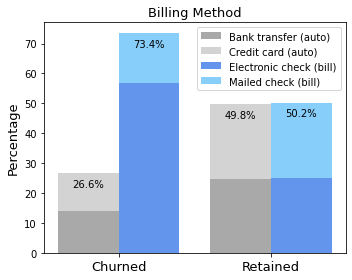

In [36]:
# Two of the four payment methods are auto pay methods, giving the telecom company control over the payments 
# The other two pyment methods are bill pay methods, allowing the user to instruct the bank to make the payments
# Perhaps there is a correlation between high churn rates and method of payment? 

paymentmethod_churn = df.groupby(['Churn', 'PaymentMethod'])['PaymentMethod'].count()
paymentmethod_churn_ratio = paymentmethod_churn / paymentmethod_churn.groupby(level=0).sum() * 100

labels = ['Churned', 'Retained']
auto_bot = [paymentmethod_churn_ratio[4], paymentmethod_churn_ratio[0]]
auto_top = [paymentmethod_churn_ratio[5], paymentmethod_churn_ratio[1]]
bill_bot = [paymentmethod_churn_ratio[6], paymentmethod_churn_ratio[2]]
bill_top = [paymentmethod_churn_ratio[7], paymentmethod_churn_ratio[3]]

x = np.arange(len(labels)) 
width = 0.4 

fig, ax = plt.subplots(figsize=(5, 4))
rects1bot = ax.bar(x - width/2, auto_bot, width, label='Bank transfer (auto)', color='darkgray')
rects1top = ax.bar(x - width/2, auto_top, width, label='Credit card (auto)', color='lightgrey', bottom=auto_bot)
rects2bot = ax.bar(x + width/2, bill_bot, width, label='Electronic check (bill)', color='cornflowerblue')
rects2top = ax.bar(x + width/2, bill_top, width, label='Mailed check (bill)', color='lightskyblue', bottom=bill_bot)

ax.set_ylabel('Percentage', size=13)
ax.set_title('Billing Method', size=13)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=13)
ax.legend()

ax.bar_label(rects1top, fmt='%.1f%%', padding=-16)
ax.bar_label(rects2top, fmt='%.1f%%', padding=-16)

fig.tight_layout()

plt.show()

* Only 27% of churned users (vs. 50% of retained users) use automatic pay methods
* Of the bill pay methods, electronic checks are especially popular among churned users, testifying to their tech-savviness
* We may deduce that churned users tend to be more engaged than retained users with their periodic expenditure on telecom services


In [37]:
# Similarly, we can expect to find shorter contract periods among churned users, who desire more control over their payments
# Looking at contract types

unique_contracts = list(pd.unique(df['Contract']))
print('Contract types: {}'.format(str(unique_contracts)[1:-1]))


Contract types: 'Two year', 'One year', 'Month-to-month'


In [38]:
# Checking contract type tendencies according to churn patterns
# Visualizing through table

contract_churn = df.groupby(['Churn', 'Contract'])['Contract'].count()
contract_churn_ratio = contract_churn / contract_churn.groupby(level=0).sum()
data = {'Churn status':['Retained', '', '', 'Churned', '', ''], 
        'Contract type':['Month-to-month', 'One year', 'Two year', 'Month-to-month', 'One year', 'Two year'],
        'Churn rate':["{0:.0f}%".format(val * 100) for val in list(contract_churn_ratio)]}
table = pd.DataFrame(data=data)
table.style.hide_index()


Churn status,Contract type,Churn rate
Retained,Month-to-month,43%
,One year,26%
,Two year,32%
Churned,Month-to-month,88%
,One year,9%
,Two year,3%


* 88% of churned users opt for a month-to-month contract (vs. 43% of retained users); Only 3% choose a two-year contract (vs. 32%)
* This reinforces our previous conclusion that churned users are more engaged with their internet bills, prefer not to commit themselves to a particular telecom company, and wish to keep their options open for switching providers

Text(0, 0.5, 'Number of Customers')

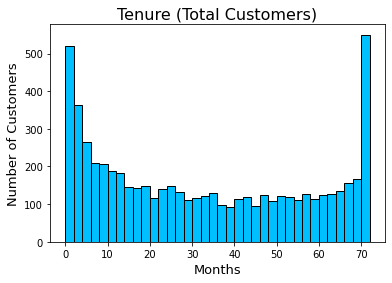

In [39]:
# Billing contract type has a strong correlation with user tenure
# Looking at tenure patterns among total users

plt.hist(df['tenure'], color = 'deepskyblue', edgecolor = 'black', bins = int(180/5))

plt.title('Tenure (Total Customers)', size=16)
plt.xlabel('Months', size=13)
plt.ylabel('Number of Customers', size=13)

Text(0.5, 0, 'Tenure (Months)')

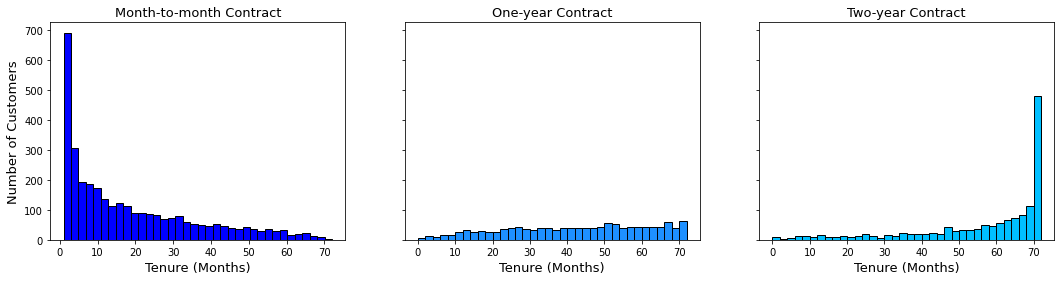

In [40]:
# Above histogram can be explained by looking at contract type's impact on tenure  

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

n, bins, patches = ax1.hist(df[df['Contract']=='Month-to-month']['tenure'], color='b', edgecolor='black', bins = int(180/5))
ax1.set_title('Month-to-month Contract', size=13)
ax1.set_xlabel('Tenure (Months)', size=13)
ax1.set_ylabel('Number of Customers', size=13)

n, bins, patches = ax2.hist(df[df['Contract']=='One year']['tenure'], color='dodgerblue', edgecolor='black', bins = int(180/5))
ax2.set_title('One-year Contract', size=13)
ax2.set_xlabel('Tenure (Months)', size=13)

n, bins, patches = ax3.hist(df[df['Contract']=='Two year']['tenure'], color='deepskyblue', edgecolor='black', bins = int(180/5))
ax3.set_title('Two-year Contract', size=13)
ax3.set_xlabel('Tenure (Months)', size=13)


 * A very large number of customers who choose a month-to-month contract churn within 2 months, whereas a large proportion of customers who choose a 2-year contract stay for longer than 70 months
 * Contract type is a strong indicator of customer tenure, and as indicated before - of customer churn rate

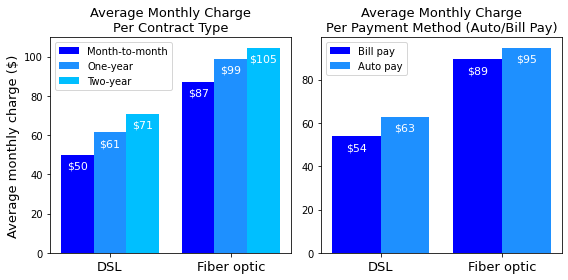

In [41]:
# Are short contracts and bill pay (= not auto pay) methods of payment indicators of the users' prioritization of price?
# Looking at average monthly charges for each internet service based on contract 
# Doing the same (average monthly charges per type of internet service) with payment method 
# Visualizing with bar charts

# First bar

df_internetusers = df[(df['InternetService'] == 'DSL') | (df['InternetService'] == 'Fiber optic')]
internetservice_charges = df_internetusers.groupby(["InternetService", 'Contract'])['MonthlyCharges'].mean()

labels = ['DSL', 'Fiber optic']
monthtomonth = [internetservice_charges[0], internetservice_charges[3]]
oneyear = [internetservice_charges[1], internetservice_charges[4]]
twoyear = [internetservice_charges[2], internetservice_charges[5]]

x = np.arange(len(labels))
width1 = 0.27

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

arects1 = ax1.bar(x - width1, monthtomonth, width1, label='Month-to-month', color='b')
arects2 = ax1.bar(x, oneyear, width1, label='One-year', color='dodgerblue')
arects3 = ax1.bar(x + width1, twoyear, width1, label='Two-year', color='deepskyblue')

ax1.set_ylabel('Average monthly charge ($)', size=13)
ax1.set_title('Average Monthly Charge\nPer Contract Type', size=13)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, size=13)
ax1.legend()

ax1.bar_label(arects1, fmt='$%.0f', padding=-16, color='white', size=11)
ax1.bar_label(arects2, fmt='$%.0f', padding=-16, color='white', size=11)
ax1.bar_label(arects3, fmt='$%.0f', padding=-16, color='white', size=11)

# Second bar

width2 = 0.4

internetservice_charges_sum = df_internetusers.groupby(["InternetService", 'PaymentMethod'])['MonthlyCharges'].sum()
internetservice_charges_count = df_internetusers.groupby(["InternetService", 'PaymentMethod'])['MonthlyCharges'].count()

dsl_autopay_mean = (internetservice_charges_sum[0] + internetservice_charges_sum[1]) / (internetservice_charges_count[0] + internetservice_charges_count[1])
dsl_billpay_mean = (internetservice_charges_sum[2] + internetservice_charges_sum[3]) / (internetservice_charges_count[2] + internetservice_charges_count[3])
fiberop_autopay_mean = (internetservice_charges_sum[4] + internetservice_charges_sum[5]) / (internetservice_charges_count[4] + internetservice_charges_count[5])
fiberop_billpay_mean = (internetservice_charges_sum[6] + internetservice_charges_sum[7]) / (internetservice_charges_count[6] + internetservice_charges_count[7])

autopay = [dsl_autopay_mean, fiberop_autopay_mean]
billpay = [dsl_billpay_mean, fiberop_billpay_mean]

brects1 = ax2.bar(x - width2/2, billpay, width2, label='Bill pay', color='b')
brects2 = ax2.bar(x + width2/2, autopay, width2, label='Auto pay', color='dodgerblue')
                
ax2.set_title('Average Monthly Charge\nPer Payment Method (Auto/Bill Pay)', size=13)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, size=13)
ax2.legend()

ax2.bar_label(brects1, fmt='$%.0f', padding=-16, color='white', size=11)
ax2.bar_label(brects2, fmt='$%.0f', padding=-16, color='white', size=11)

fig.tight_layout()

plt.show()


fig.tight_layout()

plt.show()

* The user's choice of payment method has a strong impact (or alternatively, reflects) the user's behavior, namely, his/her heightened concern for their internet service expenses 
* Users who choose a month-to-month contract, will pay, on average, 17% (Fiber-optic) to 29% (DSL) less than users who commit themselves to two-year contracts  
* Users who choose to pay as they go, pay, on average, 6% (Fiber-optic) to 14% (DSL) less than users who use automatic payment methods 

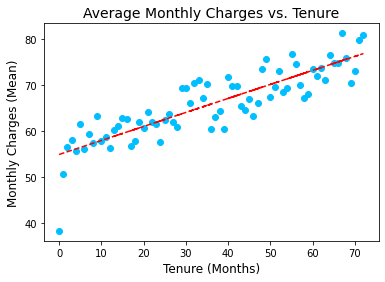

In [42]:
# After having established correlation between contract type and tenure, as well as contract and avergae monthly charge
# Looking at relationship between tenure and average monthly charges

tenure = pd.unique(df['tenure'])
monthlycharges_tenure_mean = df.groupby('tenure')['MonthlyCharges'].mean()

plt.scatter(tenure, monthlycharges_tenure_mean, c='deepskyblue')

z = np.polyfit(tenure, monthlycharges_tenure_mean, 1)
p = np.poly1d(z)
plt.plot(tenure,p(tenure),"r--")

plt.title('Average Monthly Charges vs. Tenure', size=14)
plt.xlabel('Tenure (Months)', size=12)
plt.ylabel('Monthly Charges (Mean)', size=12)
plt.show()

* Chart further supports established correlations between contract type, monthly charge and churn rate: the longer a customer stays with the company, the more s/he pays for his/her service, and the less likely s/he is to churn

# Conclusions

### Actionable Insights

* Churned users tend to be older, single, and have no dependents
* They are interested in the fastest available internet connection (fiber optic)
* They know their way around computers, foregoing the company's IT services
* They are drawn to the company's streaming services
* They are highly-informed on billing matters, preferring less-binding contracts and payment methods, and paying substantially lower rates for their internet connection
* Their average tenure is lower; they are quick to churn

#### --- Recommended efforts to reduce customer churn rates detailed in PP presentation --- 